## Info
### What is  EDA?
### Information on the dataset (source, what it contains, how it will be useful)
    - This data is being pulled from a reddit API
    - It contains information from the r/technews subreddit
    - r/technews is a subreddit for interesting technology news.

## Import Libraries

In [1]:
import requests
import json

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
sns.set_style("darkgrid")

# Python Collection
from collections import Counter
import datetime

# FOR Loop Verbose
from tqdm import tqdm

# Natural Language Processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", None, "display.max_columns", None)

[nltk_data] Downloading package punkt to /Users/iffiness/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Get the Data

Read the file using Requests.get()

There are different tags one can use : 
- new
- top
- hot 
- rising
- Random
- controversial

In [45]:
data_api = "https://www.reddit.com/r/technews/hot.json"

response_API = requests.get(data_api,headers = {'User-agent': 'yourbot'})

## Data Preparation and Cleaning

1. Parse the gotten data from json to csv format.
2. Look at information about the data and it's columns.
3. Fix missing or incorrect values.
4. Remove redundant and needless columns.

In [46]:
data = response_API.text
parse_json = json.loads(data)

In [55]:
#len(parse_json['data']['children']),parse_json['data']['children'][0]['data'].keys() 
selected_data = [parse_json['data']['children'][i]['data'] for i in range(len(parse_json['data']['children']))]

df = pd.DataFrame(selected_data)


### Preliminary EDA

In [56]:
## Numerical data
display(df.describe(), df.shape)

,gilded,pwls,downs,thumbnail_height,upvote_ratio,ups,total_awards_received,thumbnail_width,score,created,wls,num_comments,subreddit_subscribers,created_utc,num_crossposts
count,25.0,25.0,25.0,24.000000,25.0000,25.000000,25.000000,24.0,25.000000,2.500000e+01,25.0,25.000000,25.0,2.500000e+01,25.000000
mean,0.0,6.0,0.0,82.291667,0.9028,993.040000,0.280000,140.0,993.040000,1.655373e+09,6.0,115.200000,473579.0,1.655373e+09,0.560000
std,0.0,0.0,0.0,10.322955,0.0681,2023.747586,0.842615,0.0,2023.747586,5.765000e+04,0.0,219.986742,0.0,5.765000e+04,1.157584
min,0.0,6.0,0.0,70.000000,0.7600,1.000000,0.000000,140.0,1.000000,1.655242e+09,6.0,0.000000,473579.0,1.655242e+09,0.000000
25%,0.0,6.0,0.0,74.500000,0.8400,15.000000,0.000000,140.0,15.000000,1.655332e+09,6.0,1.000000,473579.0,1.655332e+09,0.000000
50%,0.0,6.0,0.0,78.000000,0.9100,142.000000,0.000000,140.0,142.000000,1.655384e+09,6.0,13.000000,473579.0,1.655384e+09,0.000000
75%,0.0,6.0,0.0,93.000000,0.9500,901.000000,0.000000,140.0,901.000000,1.655414e+09,6.0,118.000000,473579.0,1.655414e+09,0.000000
max,0.0,6.0,0.0,105.000000,1.0000,9024.000000,4.000000,140.0,9024.000000,1.655458e+09,6.0,985.000000,473579.0,1.655458e+09,4.000000


(25, 109)

Numerical columns I consider unnecessary due to redundancy
- pwls
- wls
- ups
- downs
- thumbnail_width
- created_utc
- num_crossposts
- subreddit_subscribers

### Data Cleaning

- Remove columns with lots of NA values 
- Remove columns where all values are the same to reduce the size of the dataset

In [94]:

df['Month_created']= df['created_utc'].apply(lambda utc: datetime.datetime.fromtimestamp(utc).month)
df['Day_created']= df['created_utc'].apply(lambda utc: datetime.datetime.fromtimestamp(utc).day)
df['Time_created']= df['created_utc'].apply(lambda utc: str(datetime.datetime.fromtimestamp(utc).hour)+':'+str(datetime.datetime.fromtimestamp(utc).minute))

In [95]:
missing_percentages = df.isna().sum().sort_values(ascending=False)/len(df)

useless = missing_percentages[missing_percentages >0].index.to_list()
useless, len(useless)

(['banned_by',
  'mod_note',
  'distinguished',
  'num_reports',
  'removed_by',
  'author_flair_text',
  'view_count',
  'banned_at_utc',
  'suggested_sort',
  'likes',
  'selftext_html',
  'removed_by_category',
  'content_categories',
  'removal_reason',
  'author_flair_css_class',
  'approved_by',
  'link_flair_text',
  'category',
  'secure_media',
  'author_flair_template_id',
  'author_flair_background_color',
  'top_awarded_type',
  'link_flair_css_class',
  'mod_reason_title',
  'mod_reason_by',
  'approved_at_utc',
  'discussion_type',
  'report_reasons',
  'media',
  'author_flair_text_color',
  'post_hint',
  'thumbnail_height',
  'thumbnail_width',
  'preview'],
 34)

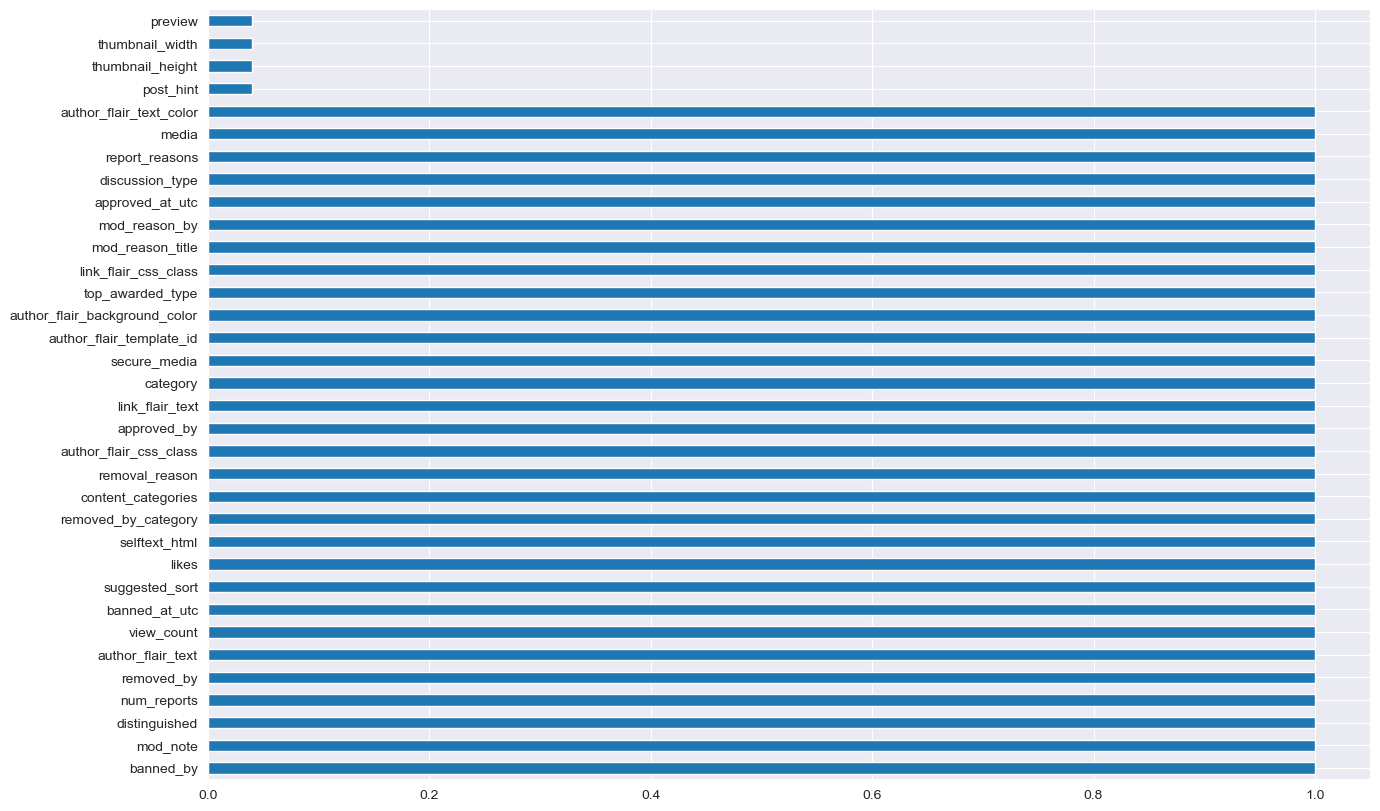

In [96]:
missing_percentages[missing_percentages>0].plot(kind = "barh",figsize=(15, 10))
plt.show()

In [97]:
df_cleaned = df.drop(useless, axis=1)
df_cleaned = df_cleaned.dropna(how='all')

display(df_cleaned.head(3), df_cleaned.shape)

,subreddit,selftext,author_fullname,saved,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,downs,hide_score,name,quarantine,link_flair_text_color,upvote_ratio,subreddit_type,ups,total_awards_received,media_embed,is_original_content,user_reports,is_reddit_media_domain,is_meta,secure_media_embed,can_mod_post,score,is_created_from_ads_ui,author_premium,thumbnail,edited,author_flair_richtext,gildings,is_self,created,link_flair_type,wls,author_flair_type,domain,allow_live_comments,url_overridden_by_dest,archived,no_follow,is_crosspostable,pinned,over_18,all_awardings,awarders,media_only,can_gild,spoiler,locked,treatment_tags,visited,subreddit_id,author_is_blocked,link_flair_background_color,id,is_robot_indexable,author,num_comments,send_replies,whitelist_status,contest_mode,mod_reports,author_patreon_flair,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,is_video,Month_created,Day_created,Time_created
0,technews,,t2_l1ket,False,0,False,Crypto Crashed So Hard It May No Longer Be Pro...,[],r/technews,False,6,0,False,t3_vdsimm,False,dark,0.96,public,9024,4,{},False,[],False,False,{},False,9024,False,False,https://b.thumbs.redditmedia.com/EI_PO9OZvIyRc...,False,[],{},False,1.655404e+09,text,6,text,hothardware.com,True,https://hothardware.com/news/crypto-crashed-ha...,False,False,False,False,False,"[{'giver_coin_reward': None, 'subreddit_id': N...",[],False,False,False,False,[],False,t5_2qi4j,False,,vdsimm,True,giuliomagnifico,985,False,all_ads,False,[],False,/r/technews/comments/vdsimm/crypto_crashed_so_...,all_ads,False,https://hothardware.com/news/crypto-crashed-ha...,473579,1.655404e+09,0,False,6,16,20:24
1,technews,,t2_i08asbdm,False,0,False,Elon Musk hints at layoffs in first meeting wi...,[],r/technews,False,6,0,False,t3_ve7v9i,False,dark,0.91,public,237,0,{},False,[],False,False,{},False,237,False,False,https://b.thumbs.redditmedia.com/jS9p-Uraxpwfn...,False,[],{},False,1.655453e+09,text,6,text,bbc.com,True,https://www.bbc.com/news/business-61836179,False,False,False,False,False,[],[],False,False,False,False,[],False,t5_2qi4j,False,,ve7v9i,True,LustrousAnnouncement,118,True,all_ads,False,[],False,/r/technews/comments/ve7v9i/elon_musk_hints_at...,all_ads,False,https://www.bbc.com/news/business-61836179,473579,1.655453e+09,1,False,6,17,9:58
2,technews,,t2_3pxn7,False,0,False,Ferrari says 60 percent of its lineup will be ...,[],r/technews,False,6,0,False,t3_vdkjbh,False,dark,0.96,public,4792,1,{},False,[],False,False,{},False,4792,False,False,https://b.thumbs.redditmedia.com/kFal-60EEBRMU...,False,[],{},False,1.655381e+09,text,6,text,engadget.com,True,https://www.engadget.com/ferrari-says-it-will-...,False,False,False,False,False,"[{'giver_coin_reward': None, 'subreddit_id': N...",[],False,False,False,False,[],False,t5_2qi4j,False,,vdkjbh,True,GoldFire33,282,True,all_ads,False,[],False,/r/technews/comments/vdkjbh/ferrari_says_60_pe...,all_ads,False,https://www.engadget.com/ferrari-says-it-will-...,473579,1.655381e+09,0,False,6,16,14:9


(25, 78)

## EDA

In [98]:
# Numeric data
numerics = ['int16', 'int32', 'int64','float64']
df_num = df_cleaned.select_dtypes(include=numerics)

display(df_num.columns, df_num.describe())

Index(['gilded', 'pwls', 'downs', 'upvote_ratio', 'ups',
       'total_awards_received', 'score', 'created', 'wls', 'num_comments',
       'subreddit_subscribers', 'created_utc', 'num_crossposts',
       'Month_created', 'Day_created'],
      dtype='object')

,gilded,pwls,downs,upvote_ratio,ups,total_awards_received,score,created,wls,num_comments,subreddit_subscribers,created_utc,num_crossposts,Month_created,Day_created
count,25.0,25.0,25.0,25.0000,25.000000,25.000000,25.000000,2.500000e+01,25.0,25.000000,25.0,2.500000e+01,25.000000,25.0,25.000000
mean,0.0,6.0,0.0,0.9028,993.040000,0.280000,993.040000,1.655373e+09,6.0,115.200000,473579.0,1.655373e+09,0.560000,6.0,15.960000
std,0.0,0.0,0.0,0.0681,2023.747586,0.842615,2023.747586,5.765000e+04,0.0,219.986742,0.0,5.765000e+04,1.157584,0.0,0.789515
min,0.0,6.0,0.0,0.7600,1.000000,0.000000,1.000000,1.655242e+09,6.0,0.000000,473579.0,1.655242e+09,0.000000,6.0,14.000000
25%,0.0,6.0,0.0,0.8400,15.000000,0.000000,15.000000,1.655332e+09,6.0,1.000000,473579.0,1.655332e+09,0.000000,6.0,16.000000
50%,0.0,6.0,0.0,0.9100,142.000000,0.000000,142.000000,1.655384e+09,6.0,13.000000,473579.0,1.655384e+09,0.000000,6.0,16.000000
75%,0.0,6.0,0.0,0.9500,901.000000,0.000000,901.000000,1.655414e+09,6.0,118.000000,473579.0,1.655414e+09,0.000000,6.0,16.000000
max,0.0,6.0,0.0,1.0000,9024.000000,4.000000,9024.000000,1.655458e+09,6.0,985.000000,473579.0,1.655458e+09,4.000000,6.0,17.000000


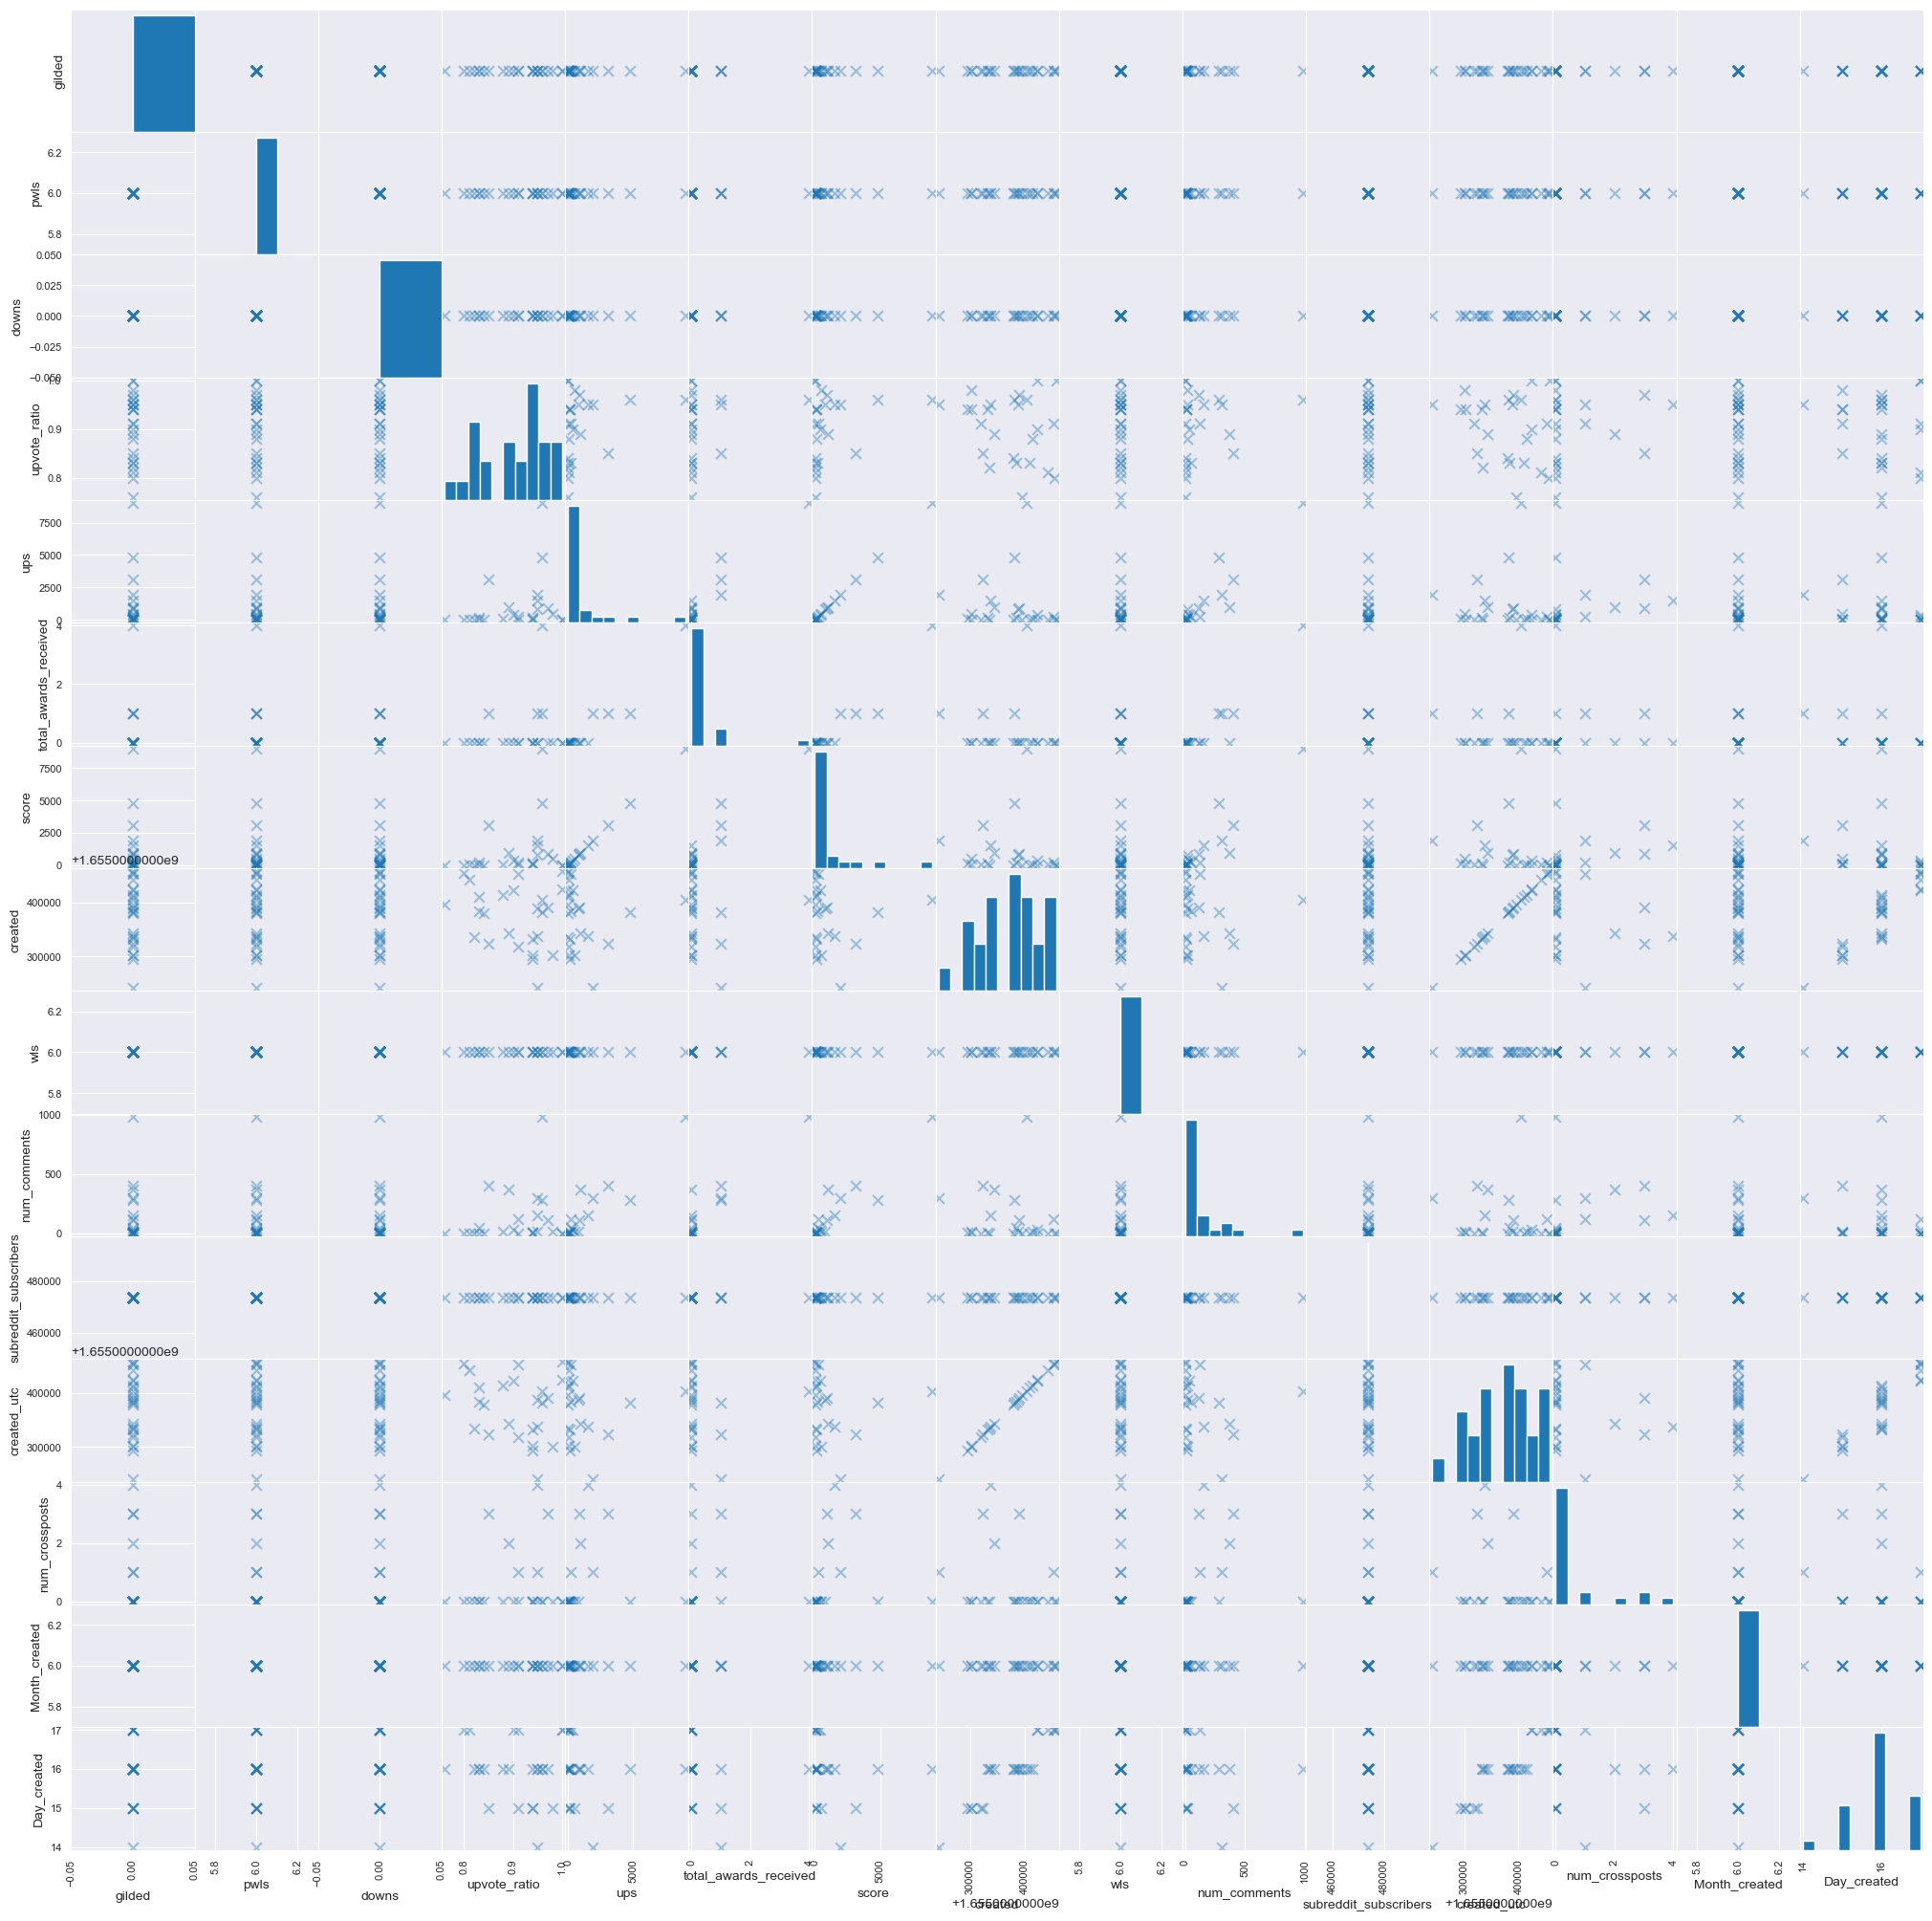

In [99]:
# Plot the numerical data 

pd.plotting.scatter_matrix(df_num,figsize=(25, 25), marker='x', s=60,alpha=.4, diagonal='hist')
plt.show()

In [100]:
#Categorical Data
non_numeric = [col for col in df.columns if col not in df_num.columns]

df_non_num = pd.DataFrame(data=[df[col].describe() for col in non_numeric], columns = ['count','unique','top','freq'])
df_non_num.index.name = 'Column Name'
display(df_non_num, type(df_non_num), df_non_num.columns)

,count,unique,top,freq
Column Name,,,,
approved_at_utc,0.0,0.0,NaN,NaN
subreddit,25.0,1.0,technews,25.0
selftext,25.0,1.0,,25.0
author_fullname,25.0,14.0,t2_3bhyn,3.0
saved,25.0,1.0,False,25.0
mod_reason_title,0.0,0.0,NaN,NaN
clicked,25.0,1.0,False,25.0
title,25.0,25.0,Internet Explorer was once synonymous with the...,1.0
link_flair_richtext,25.0,1.0,[],25.0


pandas.core.frame.DataFrame

Index(['count', 'unique', 'top', 'freq'], dtype='object')

In [147]:
useful_cat = [idx for idx, row in df_non_num.iterrows() if row["unique"]>1]
useful = useful_cat + df_num.columns.values.tolist()

df_useful = df[useful]
display(useful, len(useful), df_useful.head(), df_useful.shape)


['author_fullname',
 'title',
 'hide_score',
 'name',
 'author_premium',
 'thumbnail',
 'gildings',
 'domain',
 'allow_live_comments',
 'url_overridden_by_dest',
 'no_follow',
 'preview',
 'all_awardings',
 'id',
 'author',
 'send_replies',
 'permalink',
 'url',
 'Time_created',
 'gilded',
 'pwls',
 'downs',
 'upvote_ratio',
 'ups',
 'total_awards_received',
 'score',
 'created',
 'wls',
 'num_comments',
 'subreddit_subscribers',
 'created_utc',
 'num_crossposts',
 'Month_created',
 'Day_created']

34

,author_fullname,title,hide_score,name,author_premium,thumbnail,gildings,domain,allow_live_comments,url_overridden_by_dest,no_follow,preview,all_awardings,id,author,send_replies,permalink,url,Time_created,gilded,pwls,downs,upvote_ratio,ups,total_awards_received,score,created,wls,num_comments,subreddit_subscribers,created_utc,num_crossposts,Month_created,Day_created
0,t2_l1ket,Crypto Crashed So Hard It May No Longer Be Pro...,False,t3_vdsimm,False,https://b.thumbs.redditmedia.com/EI_PO9OZvIyRc...,{},hothardware.com,True,https://hothardware.com/news/crypto-crashed-ha...,False,{'images': [{'source': {'url': 'https://extern...,"[{'giver_coin_reward': None, 'subreddit_id': N...",vdsimm,giuliomagnifico,False,/r/technews/comments/vdsimm/crypto_crashed_so_...,https://hothardware.com/news/crypto-crashed-ha...,20:24,0,6,0,0.96,9024,4,9024,1.655404e+09,6,985,473579,1.655404e+09,0,6,16
1,t2_i08asbdm,Elon Musk hints at layoffs in first meeting wi...,False,t3_ve7v9i,False,https://b.thumbs.redditmedia.com/jS9p-Uraxpwfn...,{},bbc.com,True,https://www.bbc.com/news/business-61836179,False,{'images': [{'source': {'url': 'https://extern...,[],ve7v9i,LustrousAnnouncement,True,/r/technews/comments/ve7v9i/elon_musk_hints_at...,https://www.bbc.com/news/business-61836179,9:58,0,6,0,0.91,237,0,237,1.655453e+09,6,118,473579,1.655453e+09,1,6,17
2,t2_3pxn7,Ferrari says 60 percent of its lineup will be ...,False,t3_vdkjbh,False,https://b.thumbs.redditmedia.com/kFal-60EEBRMU...,{},engadget.com,True,https://www.engadget.com/ferrari-says-it-will-...,False,{'images': [{'source': {'url': 'https://extern...,"[{'giver_coin_reward': None, 'subreddit_id': N...",vdkjbh,GoldFire33,True,/r/technews/comments/vdkjbh/ferrari_says_60_pe...,https://www.engadget.com/ferrari-says-it-will-...,14:9,0,6,0,0.96,4792,1,4792,1.655381e+09,6,282,473579,1.655381e+09,0,6,16
3,t2_3lsam,Elon Musk sued for $258 billion over alleged D...,False,t3_vdzcn4,True,https://b.thumbs.redditmedia.com/F70D9uA_EgM2d...,{},reuters.com,False,https://www.reuters.com/legal/transactional/el...,False,{'images': [{'source': {'url': 'https://extern...,[],vdzcn4,sankscan,False,/r/technews/comments/vdzcn4/elon_musk_sued_for...,https://www.reuters.com/legal/transactional/el...,1:47,0,6,0,0.90,376,0,376,1.655423e+09,6,29,473579,1.655423e+09,0,6,17
4,t2_118e7zfy,New lawsuit claims Amazon uses Alexa to target...,False,t3_vdnlij,False,https://b.thumbs.redditmedia.com/QPsTDFvIjPY3F...,{},axios.com,False,https://www.axios.com/local/seattle/2022/06/16...,False,{'images': [{'source': {'url': 'https://extern...,[],vdnlij,afternooncrypto,False,/r/technews/comments/vdnlij/new_lawsuit_claims...,https://www.axios.com/local/seattle/2022/06/16...,16:43,0,6,0,0.97,901,0,901,1.655391e+09,6,109,473579,1.655391e+09,3,6,16


(25, 34)

TODO: 
- If the categorical column has a single unique value, I'll take it off because there's nothing to learn from it.
- Because its a general analysis, pick 4/5 random columns and plot them to see what they look like

In [128]:
chosen = ['author','score','num_comments', 'Time_created','upvote_ratio']

res = [pd.DataFrame(df_cleaned[useful_col].value_counts().sort_values()) for useful_col in chosen]

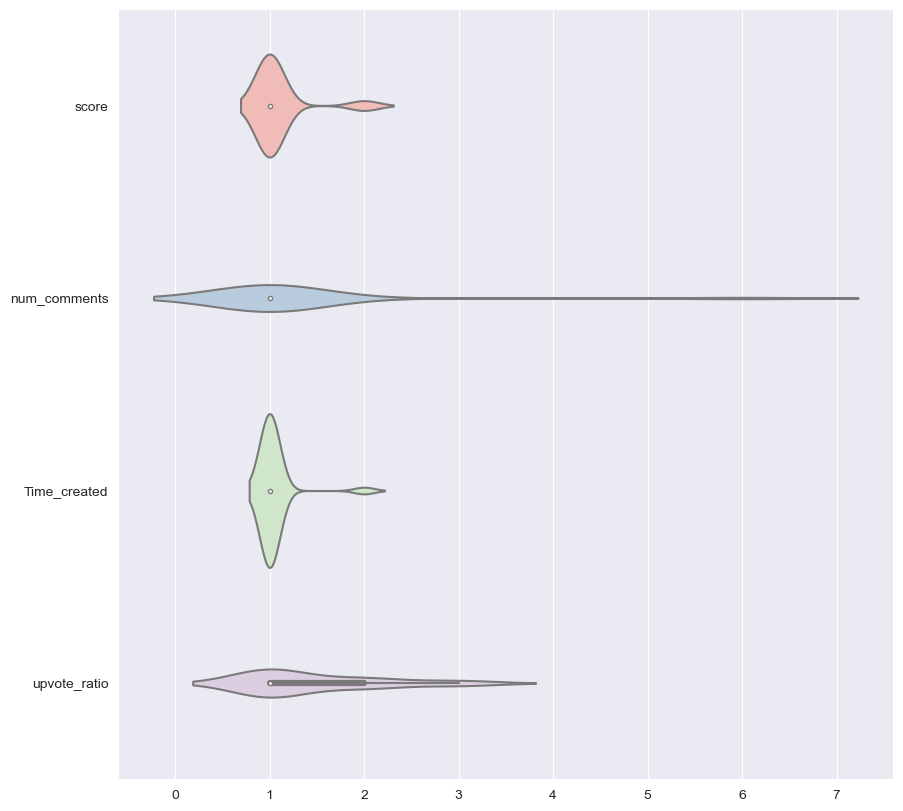

In [130]:
plt.figure(figsize=(10,10))

ax = sns.violinplot(data=res[1:], orient="h", palette="Pastel1")
ax.set_yticklabels(chosen[1:])
plt.show()

In [132]:
df_cleaned.columns

Index(['subreddit', 'selftext', 'author_fullname', 'saved', 'gilded',
       'clicked', 'title', 'link_flair_richtext', 'subreddit_name_prefixed',
       'hidden', 'pwls', 'downs', 'hide_score', 'name', 'quarantine',
       'link_flair_text_color', 'upvote_ratio', 'subreddit_type', 'ups',
       'total_awards_received', 'media_embed', 'is_original_content',
       'user_reports', 'is_reddit_media_domain', 'is_meta',
       'secure_media_embed', 'can_mod_post', 'score', 'is_created_from_ads_ui',
       'author_premium', 'thumbnail', 'edited', 'author_flair_richtext',
       'gildings', 'is_self', 'created', 'link_flair_type', 'wls',
       'author_flair_type', 'domain', 'allow_live_comments',
       'url_overridden_by_dest', 'archived', 'no_follow', 'is_crosspostable',
       'pinned', 'over_18', 'all_awardings', 'awarders', 'media_only',
       'can_gild', 'spoiler', 'locked', 'treatment_tags', 'visited',
       'subreddit_id', 'author_is_blocked', 'link_flair_background_color',
      

Upon examining the data, I'm interested in these columns:
- title
- all_awardings
- author
- permalink
- Time_created
- upvote_ratio
- total_awards_recieved
- score
- num_comments
- num_crossposts
- Day_created

In [149]:
interesting_columns = 'title,all_awardings,author,permalink,Time_created,upvote_ratio,total_awards_received,score,num_comments,num_crossposts,Day_created'
interesting_columns = interesting_columns.split(',')

df_to_use = df[interesting_columns]
df_to_use.head(3)

,title,all_awardings,author,permalink,Time_created,upvote_ratio,total_awards_received,score,num_comments,num_crossposts,Day_created
0,Crypto Crashed So Hard It May No Longer Be Pro...,"[{'giver_coin_reward': None, 'subreddit_id': N...",giuliomagnifico,/r/technews/comments/vdsimm/crypto_crashed_so_...,20:24,0.96,4,9024,985,0,16
1,Elon Musk hints at layoffs in first meeting wi...,[],LustrousAnnouncement,/r/technews/comments/ve7v9i/elon_musk_hints_at...,9:58,0.91,0,237,118,1,17
2,Ferrari says 60 percent of its lineup will be ...,"[{'giver_coin_reward': None, 'subreddit_id': N...",GoldFire33,/r/technews/comments/vdkjbh/ferrari_says_60_pe...,14:9,0.96,1,4792,282,0,16


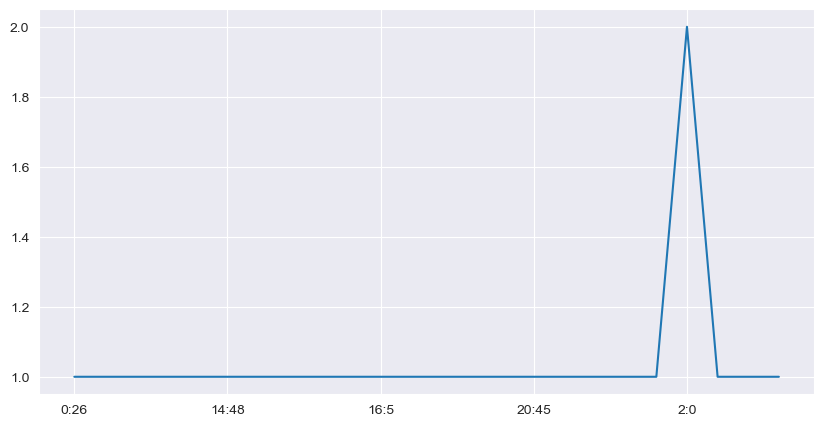

In [159]:

df_to_use.Time_created.value_counts().sort_index().plot( figsize=(10, 5))
plt.show()

100%|██████████| 25/25 [00:00<00:00, 4369.07it/s]


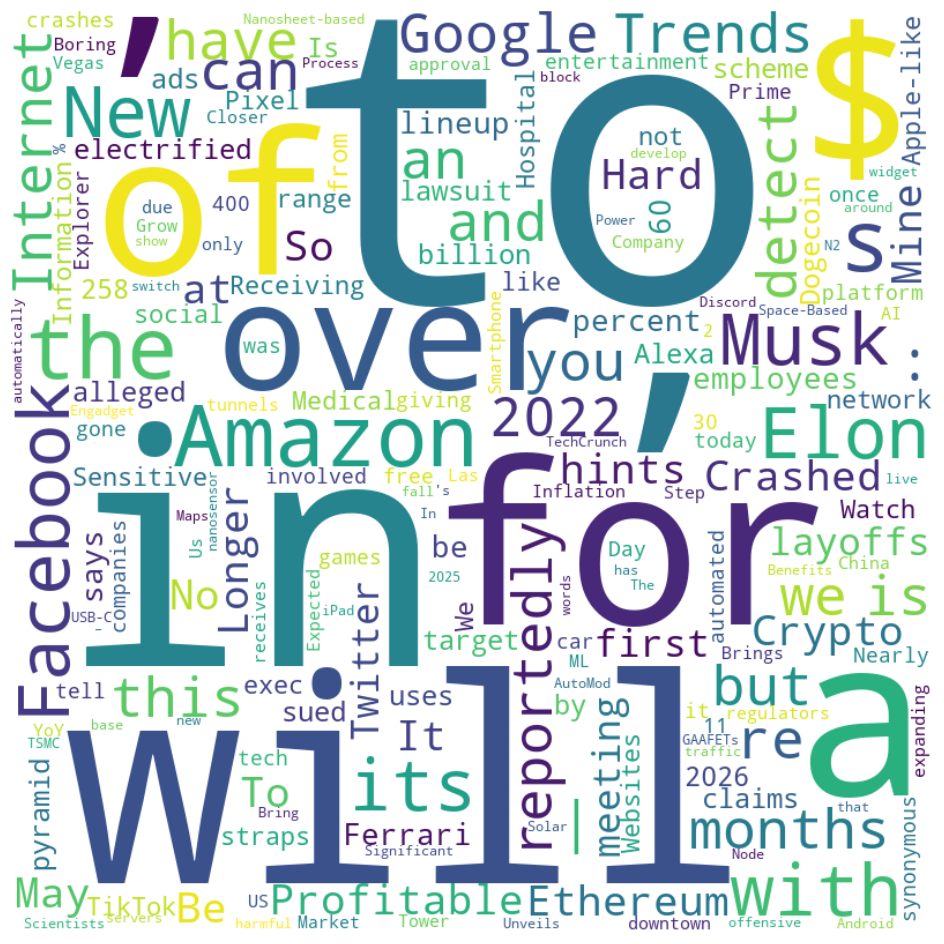

In [134]:
def wordcloud(dataset, min_freq=1):
    bow = list()
    for title in tqdm(dataset['title']):
        bow += word_tokenize(title)
    
    word_freq = dict()
    counter = Counter(bow)
    for word, freq in counter.items():
        if freq >= min_freq:
            word_freq[word] = freq
    
#     reddit_mask = np.array(Image.open('/kaggle/working/reddit_icon.png'))    
    
    wc = WordCloud(width=800, height=800, background_color='white') #, mask=reddit_mask)
    wc = wc.generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(12, 12))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    
    return counter, word_freq

counter, word_freq = wordcloud(df_cleaned)

100%|██████████| 25/25 [00:00<00:00, 4596.40it/s]


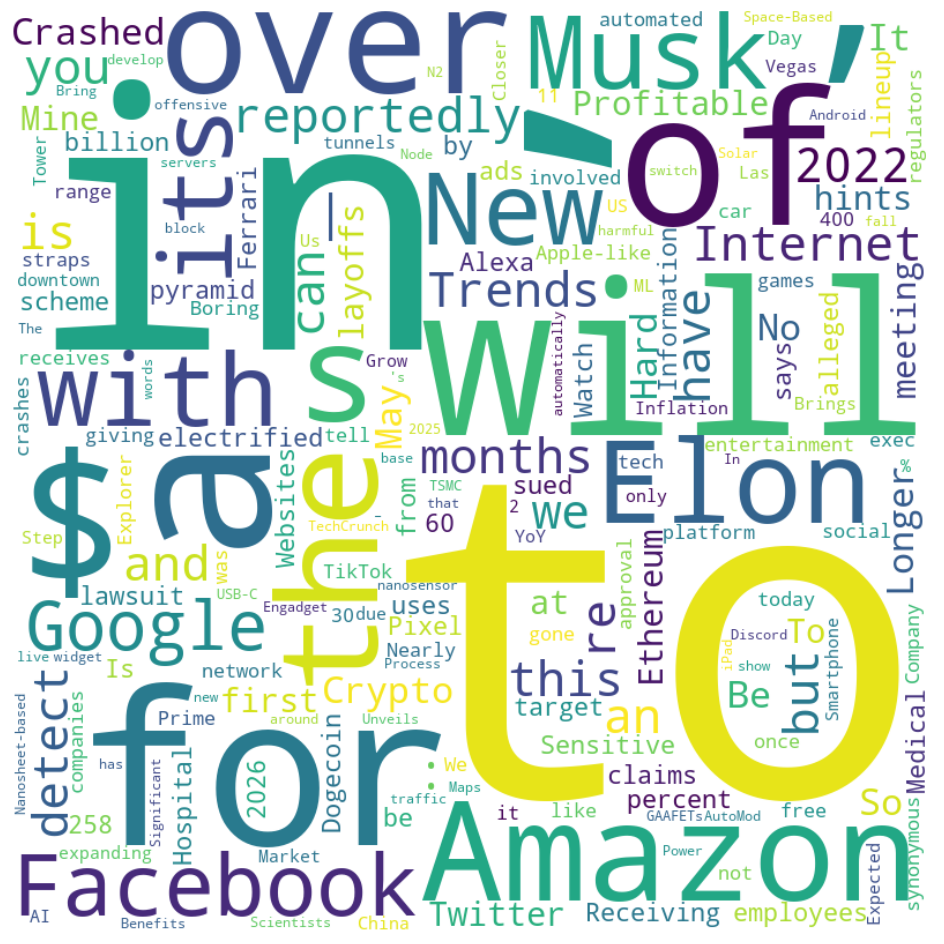

In [135]:
def wordcloud_by_date(dataset, month=None, day=None):
    dataset_cp = dataset.copy()
    
    if month:
        dataset_cp = dataset_cp[dataset_cp['Month_created'] == month]
    if day:
        dataset_cp = dataset_cp[dataset_cp['Day_created'] == day]
    
    return wordcloud(dataset_cp)

counter_june, word_freq_june = wordcloud_by_date(df_cleaned, month=6)

100%|██████████| 6/6 [00:00<00:00, 2735.71it/s]


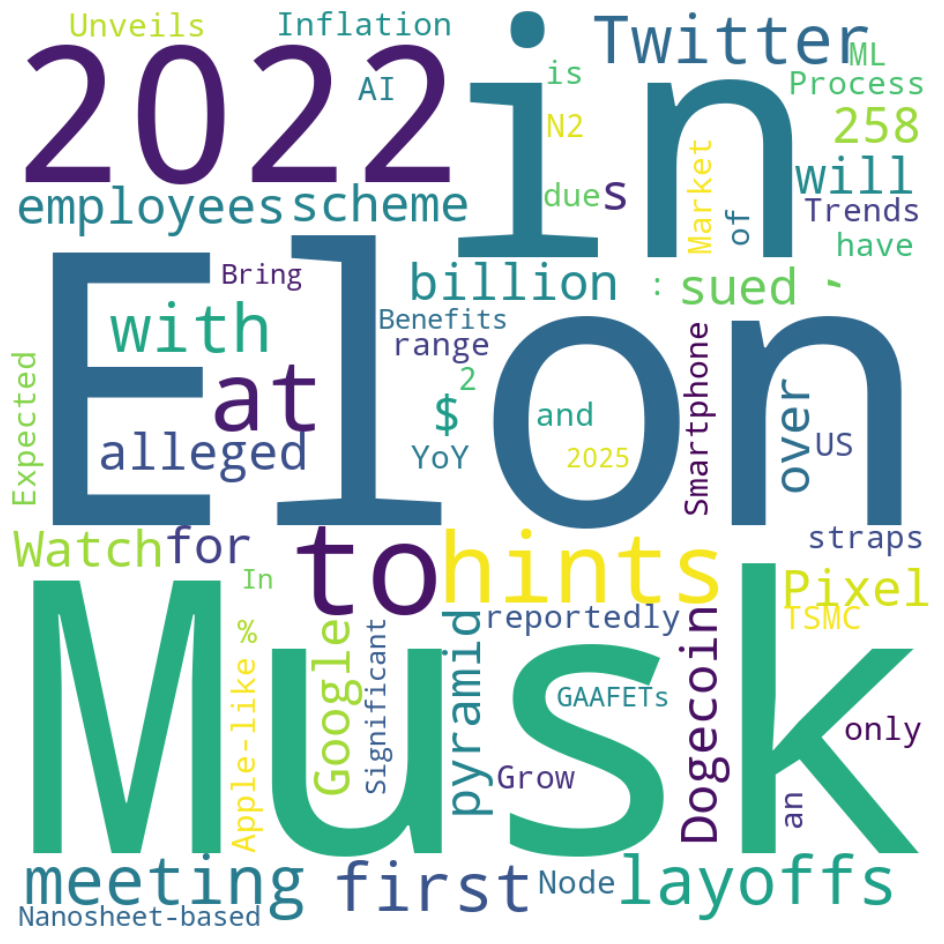

In [136]:
counter_june, word_freq_june = wordcloud_by_date(df, day=17)

100%|██████████| 13/13 [00:00<00:00, 4447.47it/s]


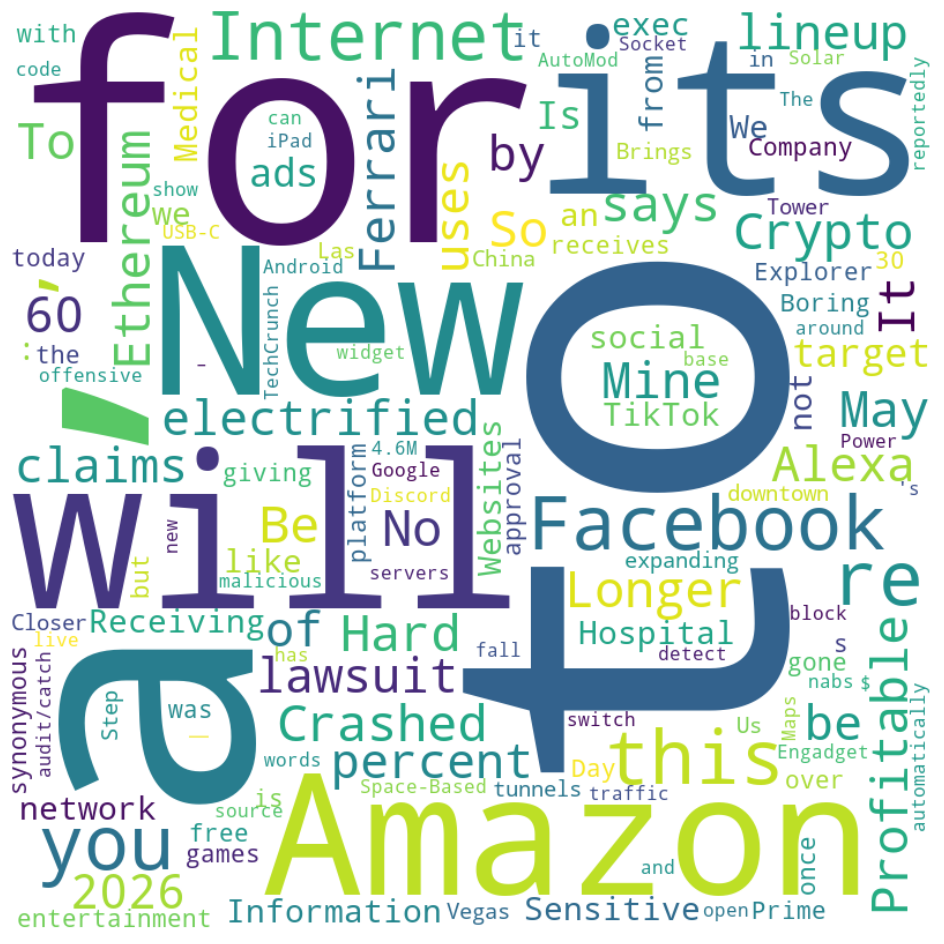

In [137]:
counter_june, word_freq_june = wordcloud_by_date(df_cleaned, day=16)

## Questions

- When do people post?
- How often are posts given awards?
- What sort of posts get crossposted? And how often?
- What is the general sentiment of the post? 
- What are people talking about today? Yesterday?

## Insights

- The data collected concerns the current month and year.
- This subreddit has 473579 subscribbers

----
1. None of the posts have been awarded a gold medal.
2. 2 people posted at 2